In [324]:
import csv
import pickle
import re
from datetime import datetime
import numpy as np
# randn = np.random.randn
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import linregress
from pylab import *
from urllib import urlopen
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from __future__ import division
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize


## Variables Pre-processing

1 - emp.var.rate = 1-value

2 - euribor = 1/value

3 - job = 1 if student or retired, 0 if other

4 - marital(? NO!) = 1 if single, o if other

5 - poutcome(?) = 1 if success 0 if other

6 - age = ((exp^((value-47)/3))-(exp^-((value-47)/3))/2 (lowest 36-58 highest 19 and 77)

7 - campaign = 1/value

8 - pdays = 1 if < 999 0 if = 999 (as "contacted before?")

9 - previous = value / 7


math.exp(x) = e ** x

math.expm1(x) = e ** -x

In [325]:
#Hyperbola centered around y axis to describe age influence (too steep)
#ex = math.exp((x-47)/3)
#emx = math.exp(-(x-47)/3)
#y = ((ex)+(emx))/2
#age = (y-1)/5000

In [326]:
bank_full = read_csv('bank-additional-full.csv', delimiter=';', header=0)
bank_full.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [327]:
bank = bank_full[['age','job','campaign','pdays','previous','poutcome','emp.var.rate','euribor3m','y']]
#bank = bank_full[['age','job','campaign','pdays','poutcome','emp.var.rate','euribor3m','y']]
bank.head(3)

,age,job,campaign,pdays,previous,poutcome,emp.var.rate,euribor3m,y
0,56,housemaid,1,999,0,nonexistent,1.1,4.857,no
1,57,services,1,999,0,nonexistent,1.1,4.857,no
2,37,services,1,999,0,nonexistent,1.1,4.857,no


In [328]:
bank['y'] = bank['y'].map({'yes': 1, 'no': 0})

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [329]:
bank['age'] = abs((bank['age']-47)/30)
bank['age'][bank['age'] > 1] = 1

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [330]:
bank['job'][bank['job'] == 'student'] = 1
bank['job'][bank['job'] == 'retired'] = 1
bank['job'][bank['job'] != 1] = 0

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [331]:
bank['campaign'] = 1 / bank['campaign']

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [332]:
bank['pdays'][bank['pdays'] != 999] = 1
bank['pdays'][bank['pdays'] == 999] = 0

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [333]:
bank['previous'] = bank['previous'] / 7

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [334]:
bank['poutcome'][bank['poutcome'] == 'failure'] = 0.5
bank['poutcome'][bank['poutcome'] == 'nonexistent'] = 0
bank['poutcome'][bank['poutcome'] == 'success'] = 1

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [335]:
bank['emp.var.rate'] = abs((bank['emp.var.rate'] - 1.4) / 4.8)

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [336]:
bank['euribor3m'] = 1 - (bank['euribor3m'] / 5.5)

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [337]:
bank.head(5)

,age,job,campaign,pdays,previous,poutcome,emp.var.rate,euribor3m,y
0,0.300000,0,1,0,0,0,0.0625,0.116909,0
1,0.333333,0,1,0,0,0,0.0625,0.116909,0
2,0.333333,0,1,0,0,0,0.0625,0.116909,0
3,0.233333,0,1,0,0,0,0.0625,0.116909,0
4,0.300000,0,1,0,0,0,0.0625,0.116909,0


In [338]:
byes = bank[bank['y'] == 1]
bno = bank[bank['y'] == 0]

In [339]:
len(byes)

4640

In [340]:
len(bno)

36548

In [341]:
#mean((byes['age'] + byes['job'] + byes['campaign'] + byes['pdays'] + byes['previous'] + byes['poutcome'] + byes['emp.var.rate'] + byes['euribor3m']) / 8)

In [342]:
#mean((bno['age'] + bno['job'] + bno['campaign'] + bno['pdays'] + bno['previous'] + bno['poutcome'] + bno['emp.var.rate'] + bno['euribor3m']) / 8)

In [343]:
#mean(byes['previous'])

In [344]:
#mean(bno['previous'])

In [345]:
X = bank.drop('y', 1)
y = bank['y']

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25, random_state=0)

In [346]:
print X.shape, X_train.shape, X_test.shape

(41188, 8) (30891, 8) (10297, 8)


In [347]:
#acc_scores = {}
#for n in range(20):
#    clf = KNeighborsClassifier(n_neighbors=(n+1)).fit(X_train, y_train)
#    y_pred_knn = clf.predict(X_test)
#    acc_scores.setdefault((n+1), [])
#    acc_scores[(n+1)].append(accuracy_score(y_test, y_pred_knn))

In [348]:
#print acc_scores

In [349]:
#max(acc_scores, key=acc_scores.get)

In [350]:
#log_model = LogisticRegression()
#log_model = log_model.fit(X_train, y_train)
#y_pred_log = log_model.predict(X_test)
#accuracy_score(y_test, y_pred_log)

In [351]:
#clf = GaussianNB()
#gnb_model = clf.fit(X_train, y_train)
#y_pred_gnb = gnb_model.predict(X_test)
#accuracy_score(y_test, y_pred_gnb)

In [352]:
clf = SVC()
svc_model = clf.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
accuracy_score(y_test, y_pred_svc)

0.89492085073322325

In [353]:
#clf = DecisionTreeClassifier()
#dtc_model = clf.fit(X_train, y_train)
#y_pred_dtc = dtc_model.predict(X_test)
#accuracy_score(y_test, y_pred_dtc)

In [354]:
clf = RandomForestClassifier()
rf_model = clf.fit(X_train, y_train)
y_pred_rfc = rf_model.predict(X_test)
accuracy_score(y_test, y_pred_rfc)

0.88472370593376715

In [355]:
precision_recall_fscore_support(y_test, y_pred_rfc, pos_label = None, average = None)

(array([ 0.91210614,  0.47765794]),
 array([ 0.96290623,  0.26770294]),
 array([ 0.93681801,  0.34311013]),
 array([9139, 1158]))

In [356]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rfc)
roc_auc = auc(fpr, tpr)

In [357]:
fpr

array([ 0.        ,  0.03709377,  1.        ])

In [358]:
tpr

array([ 0.        ,  0.26770294,  1.        ])

In [359]:
roc_auc

0.61530458108041963

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


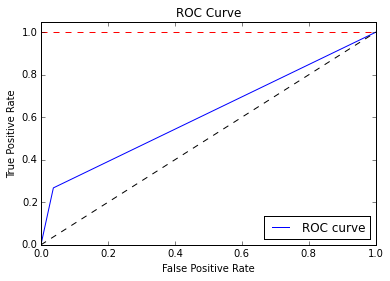

In [360]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()